# 1. 베르누이 시도
* 베르누이 시도(Bernoulli trial) : 결과가 두 가지 중 하나로만 나오는 실험이나 시도  
ex)  
동전을 한 번 던져 앞면(H:Head) 또는 뒷면(T:Tail)이 나오는 시도

# 2. 베르누이 확률변수
* 베르누이 확률변수(Bernoulli random variable) : 베르누이 확률변수의 결과를 실수 0 또는 1로 바꾼 것
* 베르누이 확률변수의 표본값은 정수 1과 0 또는 정수 1과 -1로 표현한다.
* 베르누이 확률변수의 확률질량함수
$$ Bern(x;\mu) = \begin{cases} \mu & \text{if } x = 1,\\ 1 - \mu & \text{if } x = 0 \end{cases}$$
    * 모수(parameter) $\mu$ : 1이 나올 확률
    * $1 - \mu$ : 0이 나올 확률
    * 괄호 안은 변수;모수를 뜻함
* 위 식 하나의 수식으로 표시
$$ Bern(x;\mu) = \mu^x(1-\mu)^{(1-x)} $$

## 연습 문제
위 식에서 $x = 1$과 $x = 0$을 각각 대입하여 원래의 확률 질량 함수 수식이 나오는 것을 확인한다.

$$ Bern(1;\mu) = \mu $$
$$ Bern(0;\mu) = 1 - \mu $$

#### 베르누이 확률변수가 1, 0이 아닌 1, -1일 때의 수식
$$ Bern(x;\mu) = \mu^{\frac{1+x}{2}}(1 - \mu)^{\frac{1-x}{2}} $$

만약 어떤 확률변수 X가 베르누이 분포에 의해 발생된다면  
**"확률변수 $X$가 베르누이 분포를 따른다"**라고 말하고 다음과 같은 수식으로 쓴다.
$$ X ∼ Bern(x;\mu) $$

# 2. SciPy를 사용한 베르누이 확률변수 시뮬레이션
#### bernoulli 클래스
베르누이 확률변수를 구현한다.  
* `bernoulli(p)`  
    * `p` : 분포의 모수 $\mu$ 설정

In [6]:
# 동전 앞면이 나올 확률이 0.6인 확률 생성기
import scipy as sp

mu = 0.6
rv = sp.stats.bernoulli(mu)
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

##### pmf 메서드
확률질량함수를 나타낸다.

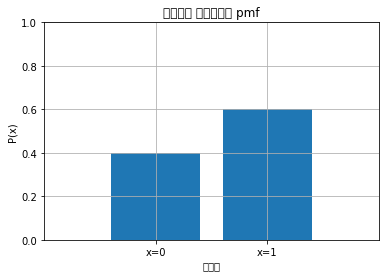

In [11]:
import matplotlib.pyplot as plt

xx = [0, 1]

plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 pmf")
plt.grid()
plt.show()

#### 시뮬레이션(simulation) 
확률변수의 표본을 생성하는 작업  
ex)  
위에서 만든 동전을 100개 표본을 생성하여 100번 던져 나올 결과를 나타낼 수 있다.

##### rvs 메서드
표본값을 무작위로 생성한다.

In [12]:
# 100개 표본 생성
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

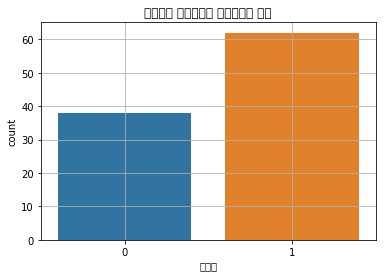

In [16]:
# 시뮬레이션 결과 시각화
import seaborn as sns

sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.grid()
plt.show()

In [21]:
# 이론적인 확률분포와 표본의 확률분포 나타내기
import numpy as np
import pandas as pd

y = np.bincount(x, minlength=2) / float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
df.index = [0, 1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [24]:
# barplot으로 시각화
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]
df2

,표본값,유형,비율
0,0,이론,0.40
1,0,시뮬레이션,0.38
2,1,이론,0.60
3,1,시뮬레이션,0.62


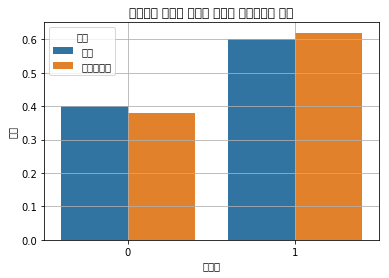

In [27]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("베르누이 분포의 이론적 분포와 시뮬레이션 분포")
plt.grid()
plt.show()

## 연습 문제
베르누이 확률분포의 모수가 다음과 같은 경우에 각각 표본을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률밀도함수와 비교한 바 플롯을 그린다. 표본의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.  
1. $\mu = 0.5$

In [30]:
mu05 = 0.5
rv05 = sp.stats.bernoulli(mu05)
rv05.mean(), rv05.var()

(0.5, 0.25)

In [56]:
# 표본 10개
sample10 = rv05.rvs(10, random_state=3)
y10 = np.bincount(sample10, minlength=2) / float(len(sample10))
# 표본 1000개
sample1000 = rv05.rvs(1000, random_state=4)
y1000 = np.bincount(sample1000, minlength=2) / float(len(sample1000))

df3 = pd.DataFrame({"이론값": rv05.pmf([0, 1]), "10개 시뮬레이션": y10, 
              "1000개 시뮬레이션": y1000})
df3

,이론값,10개 시뮬레이션,1000개 시뮬레이션
0,0.5,0.5,0.481
1,0.5,0.5,0.519


In [57]:
df4 = df3.stack().reset_index()
df4.columns = ["표본값", "유형", "비율"]
df4

,표본값,유형,비율
0,0,이론값,0.500
1,0,10개 시뮬레이션,0.500
2,0,1000개 시뮬레이션,0.481
3,1,이론값,0.500
4,1,10개 시뮬레이션,0.500
5,1,1000개 시뮬레이션,0.519


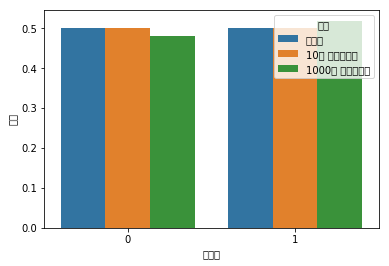

In [58]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df4)

2. $mu = 0.9$

# 3. 베르누이 분포의 모멘트
 ## 3.1. 기댓값
 $$ E[X] = \mu $$
 > **증명**  
 $$ E[X] = \sum x_iP(x_i) = 1·\mu + 0·(1 - \mu) = \mu $$

 ## 3.2. 분산
 $$ Var[X] = \mu(1 - \mu) $$
 > **증명**  
 $$ Var[X] = \sum(x_i - \mu)^2P(x_i) = (1 - \mu)^2·\mu + (0 - \mu)^2·(1 - \mu) $$
 $$ = \mu(1 - \mu) $$

앞의 예 이론적인 기댓값, 분산  
$\mu = 0.6$이므로,
$$ E[X] = 0.6 $$
$$ Var[X] = 0.6·(1 - 0.6) = 0.24 $$

In [59]:
np.mean(x)

0.62

In [60]:
np.var(x, ddof=1)

0.23797979797979804

In [66]:
s = sp.stats.describe(x)
s[2], s[3]

(0.62, 0.23797979797979804)

# 4. 베르누이 분포의 모수추정
베르누이 분포 모수 $\mu$를 추정한 $\hat \mu$는 다음처럼 계산한다.
$$ \hat \mu = \frac{\sum_{i=1}^Nx_i}{N} = \frac{N_1}{N} $$
* $N$ : 전체 데이터 수
* $N_1$ : 1이 나온 횟수

# 5. 베르누이 분포의 활용
* 활용 경우
    1. 빈도주의적 관점  
    입력 데이터가 0/1 혹은 참/거짓같이 2개의 값으로 구분되는 카테고리 값인 경우,    
    두 종류의 값이 나타나는 비율을 표현하기 위해 사용
    2. 베이지안 관점  
    분류 예측문제의 출력 데이터가 2개의 값으로 구분되는 카테고리 값인 경우,  
    두 값 중 어느 값이 가능성이 높은지 표현하기 위해 사용
------------------
ex)  
스팸 메일(spam mail)과 정상메일을 구분하는 스팸 메일 필터  
메일 10통 중 6통이 스팸 메일이라면 이 메일 계정으로 들어온 메일이 스팸 메일일 가능성은 60%이다.  
이러한 상황은 $\mu = 0.6$인 베르누이 분포로 나타낼 수 있다.
$$ P_Y = Bern(y;\mu = 0.6) $$
* 확률변수 $Y$ : 스팸 메일인지 아닌지를 나타냄  
$Y = 1$이면 스팸 메일
* 또한 스팸 메일은 특정한 단어(키워드)를 가지고 있을 확률이 높다.  
스팸 메일을 구분하기 위한 키워드가 여러 개라면 BOW(Bag of Words) 인코딩된 벡터로 나타낼 수 있다.
$$ x = \begin{bmatrix} 1\\ 0\\ 1\\ 0 \end{bmatrix} $$
    * 4개의 키워드
    * 어떤 메일이 첫 번째, 세 번째 키워드를 포함하고 있는 특징 벡터
* 여러 개 메일에 대한 키워드를 나타내는 특징 행렬
$$ X = \begin{bmatrix}
    1 & 0 & 1 & 0 \\
    1 & 1 & 1 & 0 \\
    1 & 1 & 0 & 1 \\
    0 & 0 & 1 & 1 \\
    1 & 1 & 0 & 0 \\
    1 & 1 & 0 & 1 \\
    \end{bmatrix} $$
    * 행 벡터 : 메일
    * 열 벡터 : 키워드
* 4개의 베르누이 확률분포의 튜플$(X_1, X_2, X_3, X_4)$로 나타내기
$$ X_1 ∼ Bern(x_1;\mu_1) : 스팸 메일이 첫 번째 키워드를 포함하고 있을 확률 $$
$$ X_2 ∼ Bern(x_2;\mu_2) : 스팸 메일이 두 번째 키워드를 포함하고 있을 확률 $$
$$ X_3 ∼ Bern(x_3;\mu_3) : 스팸 메일이 세 번째 키워드를 포함하고 있을 확률 $$
$$ X_4 ∼ Bern(x_4;\mu_4) : 스팸 메일이 네 번째 키워드를 포함하고 있을 확률 $$
* 특징 행렬의 각 열로부터 각 베르누이 확률분포의 모수의 추정값
$$ \hat \mu_1 = \frac{5}{6}, \text{ }\hat \mu_2 = \frac{4}{6}, \text{ }\hat \mu_3 = \frac{3}{6}, \text{ }\hat \mu_4 = \frac{3}{6} $$

## 연습 문제
1. 스팸 메일이 아닌 정상 메일의 데이터가 다음과 같은 특징 행렬로 표시되면 정상 메일의 특성은 어떻게 나타낼 수 있는가?
$$ \begin{bmatrix}
    0 & 0 & 1 & 1 \\
    0 & 1 & 1 & 1 \\
    0 & 0 & 1 & 1 \\
    1 & 0 & 0 & 1
    \end{bmatrix} $$

$$ X_1 ∼ Bern(x_1=0;\mu_1) → \hat \mu_1 = \frac{3}{4} $$

$$ X_2 ∼ Bern(x_2=0;\mu_1) → \hat \mu_2 = \frac{3}{4} $$

$$ X_3 ∼ Bern(x_3=0;\mu_1) → \hat \mu_3 = \frac{1}{4} $$

$$ X_4 ∼ Bern(x_4=0;\mu_1) → \hat \mu_4 = 0 $$

2. 스팸 메일과 정상 메일의 특성을 모두 모형화하려면 몇 개의 베르누이 확률변수가 필요한가?